In [171]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder, StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [172]:
# load data set and see typical data
data = pd.read_csv('country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [173]:
# check data types and any null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [174]:
# see statistics of data, we find there are outliers in imports and exports but this is factually correct and not a fault in the data collection
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

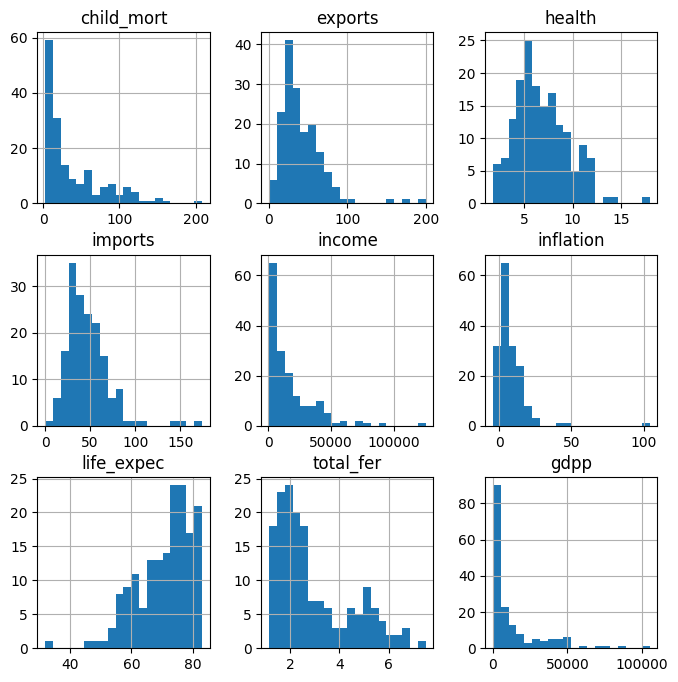

In [175]:
# see distribution of data
data.hist(bins=20, figsize=(8,8))

In [176]:
# normalise data
data_to_use = data.iloc[:,1:]
data_scaled = normalize(data_to_use)
data_scaled = pd.DataFrame(data_scaled, columns=data_to_use.columns)

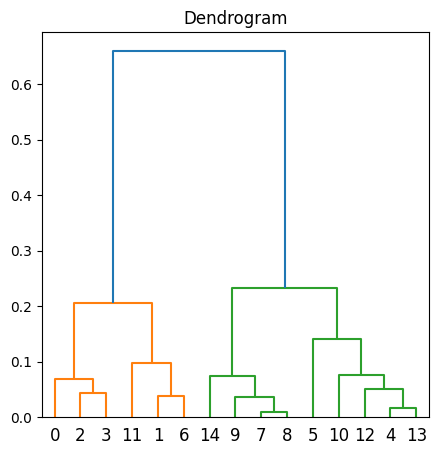

In [177]:
subset_data = data_scaled.sample(n=15)

plt.figure(figsize=(5,5))
plt.title('Dendrogram')
dend_norm = shc.dendrogram(shc.linkage(subset_data, method='ward'))

In [178]:
# deciding number of features to analyse
pca = PCA()
pca.fit(data_scaled)

cum_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_var)

# choose the number of components to keep based on 99% variance
n_components = np.argmax(cum_var >= 0.99)

print(n_components) # 2 means index 2 and so 3 components

pca = PCA(n_components=n_components+1)
reduced_data = pca.fit_transform(data_scaled)

[0.95001327 0.98783186 0.99656444 0.99885668 0.99938655 0.99982687
 0.99998048 0.99999753 1.        ]
2


In [179]:
# choose best number of clusters using silhouette score
best_k = 2
best_score = 0

# calculate silhouette score for each value of k from 2 to 10
for k in range(2,11):
    agg_clus = AgglomerativeClustering(n_clusters=k, linkage='ward')
    clust = agg_clus.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, clust)
    if score > best_score:
        best_score = score
        best_k = k

print(f"The best Silhouette score is: {best_score} for k={best_k}")

The best Silhouette score is: 0.659845617925643 for k=2


In [180]:
# perform the clustering
agg_clus = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clust_pred = agg_clus.fit_predict(reduced_data)

Text(0.5, 1.0, 'Visual representation of clustering')

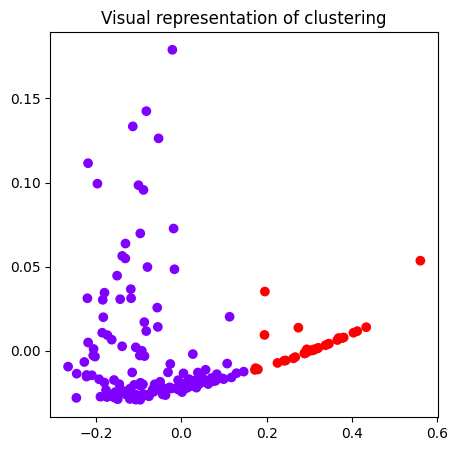

In [181]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data[:,0], y=reduced_data[:,1], c=agg_clus.labels_, cmap='rainbow')
plt.title('Visual representation of clustering')

In [182]:
# add cluster labels to data
data['Clusters'] = agg_clus.labels_

In [183]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


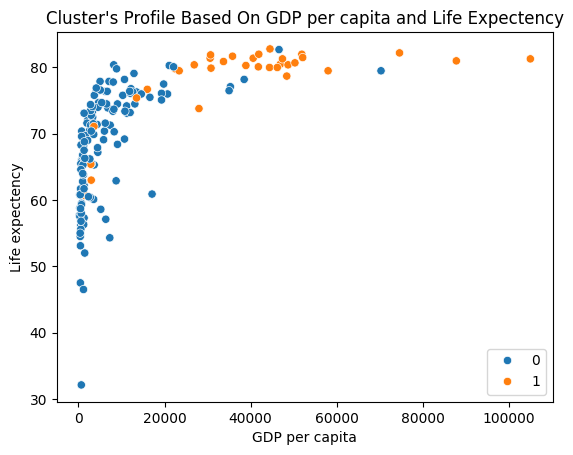

In [184]:
pl = sns.scatterplot(data = data,x=data["gdpp"], y=data["life_expec"], hue=data["Clusters"], palette='tab10')
pl.set_title("Cluster's Profile Based On GDP per capita and Life Expectency")
plt.legend()
plt.xlabel("GDP per capita")
plt.ylabel("Life expectency")
plt.show()


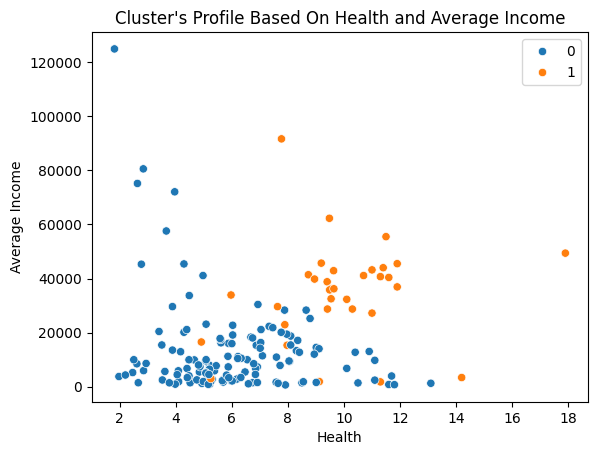

In [185]:
pl = sns.scatterplot(data = data,x=data["health"], y=data["income"], hue=data["Clusters"], palette='tab10')
pl.set_title("Cluster's Profile Based On Health and Average Income")
plt.legend()
plt.xlabel("Health")
plt.ylabel("Average Income")
plt.show()


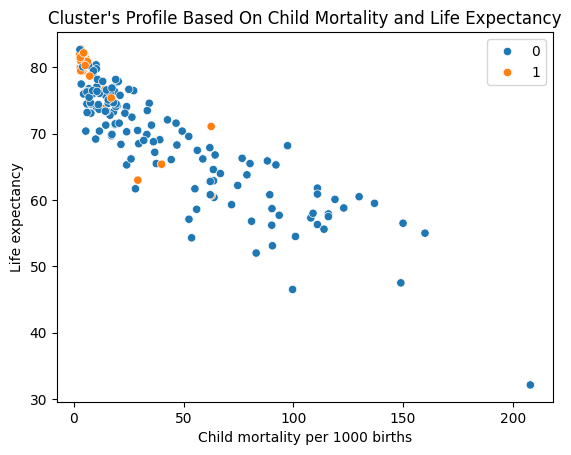

In [186]:
pl = sns.scatterplot(data = data,x=data["child_mort"], y=data["life_expec"], hue=data["Clusters"], palette='tab10')
pl.set_title("Cluster's Profile Based On Child Mortality and Life Expectancy")
plt.legend()
plt.xlabel("Child mortality per 1000 births")
plt.ylabel("Life expectancy")
plt.show()


In [187]:
# k-means clustering
# choose best number of clusters using silhouette score
best_k = 2
best_score = 0

# calculate silhouette score for each value of k from 2 to 10
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init=15)
    clust = kmeans.fit_predict(data_scaled)
    score = silhouette_score(reduced_data, clust)
    if score > best_score:
        best_score = score
        best_k = k

print(f"The best Silhouette score is: {best_score} for k={best_k}")

kmeans = KMeans(n_clusters=2, n_init=15)
clust = kmeans.fit_predict(data_scaled)

The best Silhouette score is: 0.643596619541944 for k=2


Text(0.5, 1.0, 'Visual representation of clustering')

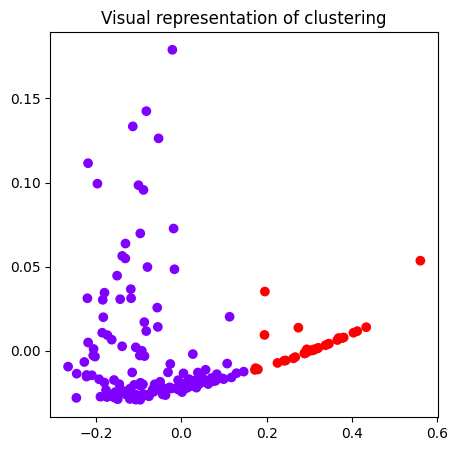

In [188]:
plt.figure(figsize=(5,5))
plt.scatter(x=reduced_data[:,0], y=reduced_data[:,1], c=agg_clus.labels_, cmap='rainbow')
plt.title('Visual representation of clustering')

In [189]:
# add cluster labels to data
data['Clusters 2'] = kmeans.labels_

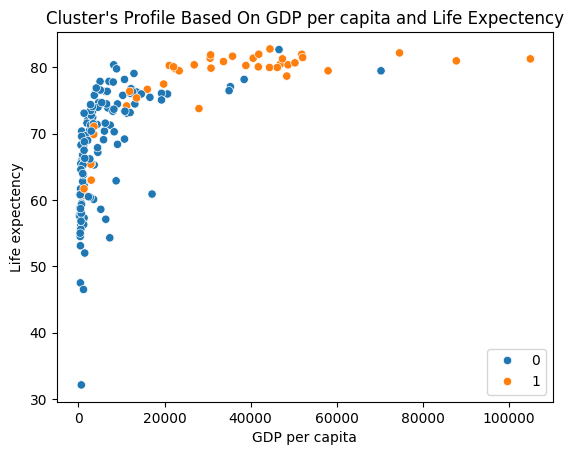

In [190]:
pl = sns.scatterplot(data = data,x=data["gdpp"], y=data["life_expec"], hue=data["Clusters 2"], palette='tab10')
pl.set_title("Cluster's Profile Based On GDP per capita and Life Expectency")
plt.legend()
plt.xlabel("GDP per capita")
plt.ylabel("Life expectency")
plt.show()


In [191]:
# compare different clusterings, it seems like kmeans has randomly chosen to put the clusters in a different order
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters,Clusters 2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,0


In [192]:
# compare difference between kmeans and agglomerative clustering, close to -1 means the clusterings are very similar
print(f"The correlation between the two clusterings is: {data['Clusters'].corr(data['Clusters 2'])}")
print(f"The percent similarity between the two clusterings is: {round(100 - metrics.accuracy_score(data['Clusters'],data['Clusters 2'])*100,2)}%")


The correlation between the two clusterings is: 0.884252783470104
The percent similarity between the two clusterings is: 4.19%
